In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

#import streamlit as st
from datetime import date

Importing plotly failed. Interactive plots will not work.
Today's date: 2021-04-26
Today's date: 2021-04-26


In [4]:
today = date.today()

In [5]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:01<00:00,  1.58s/it]
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
WetterVorhersage = WetterVorhersageNBG()

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/36.7M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 752k/36.7M [00:00<00:05, 7.46MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.45M/36.7M [00:00<00:04, 7.43MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.17M/36.7M [00:00<00:04, 7.41MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.89M/36.7M [00:00<00:04, 7.43MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|▉         | 3.60M/36.7M [00:00<00:04, 7.29MiB/s]
https://opendata.dwd.de/weathe

In [7]:
df_test = df

In [8]:
trainings_zeitraum_von = '2020-8-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

<AxesSubplot:title={'center':'Trainingsdaten am 2021-04-26'}, xlabel='Date'>

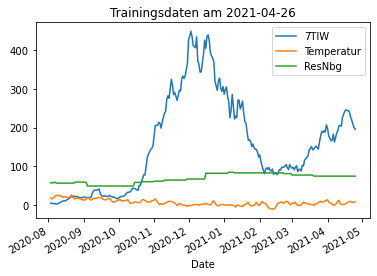

In [9]:
df_test.plot(title='Trainingsdaten am '+str(today))

<AxesSubplot:>

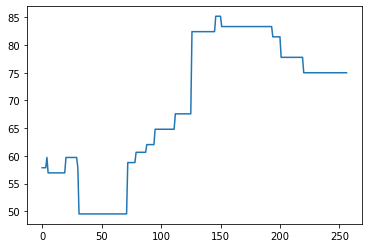

In [20]:
df_test.ResNbg.plot()

In [11]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [12]:
#df_test

In [13]:
m = Prophet(changepoint_prior_scale=2)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
#WetterVorhersage.head(20)

In [14]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

In [15]:
future['Temperatur'] = future.join(WetterVorhersage)
future['ResNbg'] = df_test.ResNbg.iloc[-1]
future = future.reset_index()

In [16]:
future.tail(20)

,ds,Temperatur,ResNbg
0,2021-04-26,9.736364,75.0
1,2021-04-27,8.5,75.0
2,2021-04-28,11.408333,75.0
3,2021-04-29,12.391667,75.0
4,2021-04-30,10.85,75.0
5,2021-05-01,9.495833,75.0
6,2021-05-02,9.016667,75.0
7,2021-05-03,9.4,75.0
8,2021-05-04,10.908333,75.0
9,2021-05-05,12.679167,75.0


In [17]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

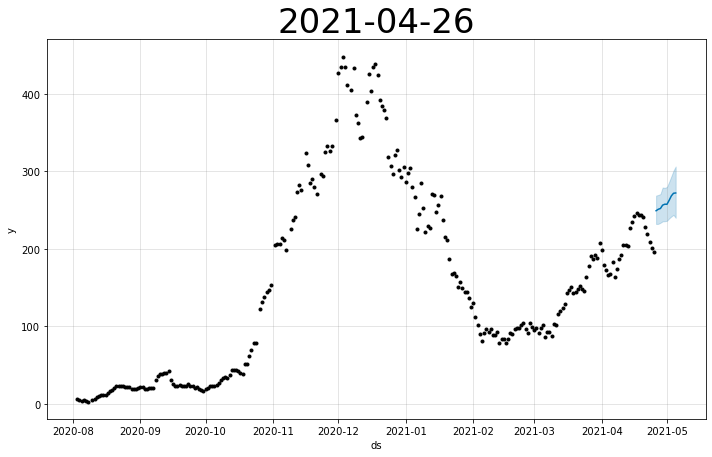

In [18]:
fig = m.plot(forecast)
ax = fig.gca()
ax.set_title(today, size=34)
fig.savefig('Vorhersagen/'+str(today)+'.png')
#plt.close(fig)

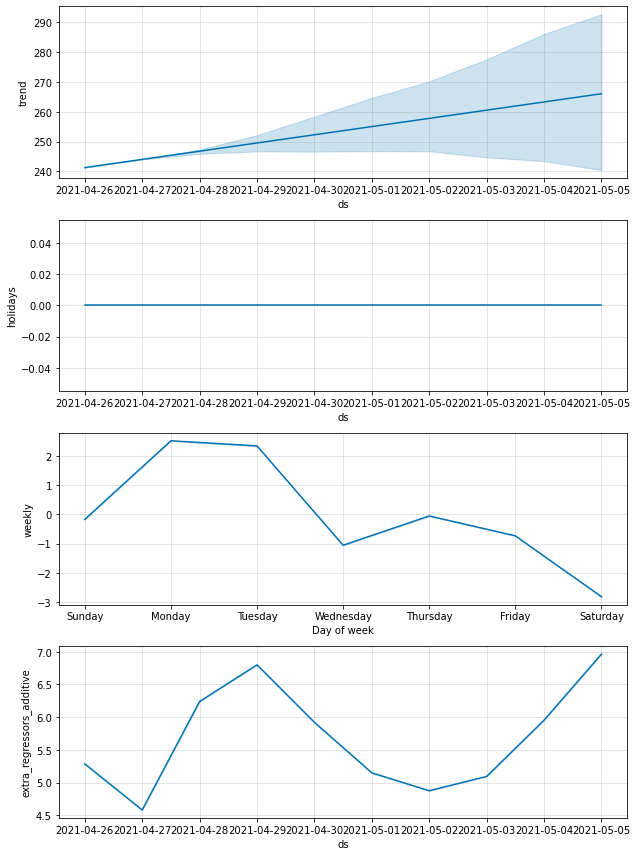

In [19]:
fig2 = m.plot_components(forecast)

In [45]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christi Himmelfahrt,Christi Himmelfahrt_lower,Christi Himmelfahrt_upper,Erster Mai,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-24,241.54982,226.571611,262.994394,241.549820,241.549820,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.941456,-1.941456,-1.941456,0.0,0.0,0.0,245.457607
1,2021-04-25,244.44895,232.153803,267.787987,244.448950,244.448950,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.236717,1.236717,1.236717,0.0,0.0,0.0,249.625033
2,2021-04-26,247.34808,233.984867,271.749476,246.375295,247.539540,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.446803,2.446803,2.446803,0.0,0.0,0.0,253.414122
3,2021-04-27,250.24721,237.399524,274.667992,247.224906,252.020940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.940120,1.940120,1.940120,0.0,0.0,0.0,257.120616
4,2021-04-28,253.14634,235.876584,275.908720,247.663430,256.879782,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.660414,-1.660414,-1.660414,0.0,0.0,0.0,258.041192
5,2021-04-29,256.04547,238.693489,283.553136,247.581488,262.308953,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.543560,-0.543560,-0.543560,0.0,0.0,0.0,262.267545
6,2021-04-30,258.94460,238.059396,285.329423,247.060960,268.810823,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.478211,-1.478211,-1.478211,0.0,0.0,0.0,263.149688
7,2021-05-01,261.84373,240.810111,287.113442,246.320107,274.811411,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.941456,-1.941456,-1.941456,0.0,0.0,0.0,264.805072
8,2021-05-02,264.74286,245.058553,295.912485,245.473539,281.286677,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.236717,1.236717,1.236717,0.0,0.0,0.0,271.787878
9,2021-05-03,267.64199,246.218104,304.061060,243.806576,288.267646,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.446803,2.446803,2.446803,0.0,0.0,0.0,276.903210
